In [111]:
# Kaggle.com 

# 타이타닉

# 가정: "실제 어린 아이들이 많이 생존했나?"
# 가정: "객실등급 1등급 인 사람들이 많이 살았다."
# 가정: "남자, 여자"

In [112]:
# data/train.csv

# 1. 남자/여자 수
# 2. 나이대별 사람 수 ( 10대 ___명, 20대 ___ 명, 30대 ___ 명 )

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv("../../data/titanic.csv")

In [115]:
# df.head()         # Pclass: 객실등급, 성별, 나이, 생존 여부

In [116]:
# df.groupby(["Sex", "Pclass"]).size()

In [117]:
# df.Age.dropna().apply(lambda x: str(x)[:1])

In [118]:
import math

In [119]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [120]:
df = pd.concat(
    [df, age_series],
    axis=1,
)

In [121]:
df.Age_Group = df.Age_Group.fillna("Uncategorized")

In [122]:
df.groupby("Age_Group").size()

Age_Group
0.0               62
10.0             102
20.0             220
30.0             167
40.0              89
50.0              48
60.0              19
70.0               6
80.0               1
Uncategorized    177
dtype: int64

In [123]:
df.groupby(["Pclass", "Sex"]).agg({"Survived": "mean"})

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [124]:
df.groupby("Pclass").agg({"Survived": "mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [125]:
df.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [126]:
# 숫자를 센다

In [127]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True,
)                   # pd.crosstab?

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [128]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [129]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)

In [133]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


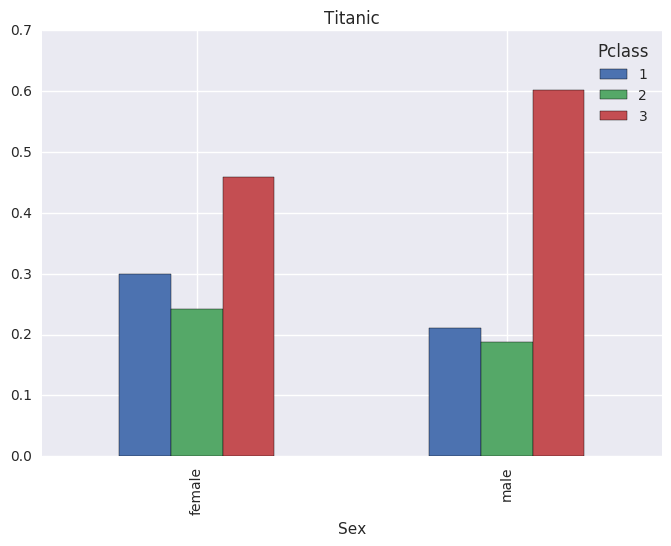

In [134]:
 result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
#ax = result_df.plot(kind="barh", title="Titanic", stacked=True)

# DataFrame. plot ( option )
# import seaborn as sns

In [86]:
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
